# Import pakages and load the spam text dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('spam.tsv',sep = '\t')

In [4]:
df.head() # preview out dataset

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

There are no null data values in our dataset

In [7]:
df.shape

(5572, 4)

There are totally 5572 messages in our dataset

In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

This dataset seems to be unbalanced, in which ham messages account for a majority of the labels

# Balance our dataset

In [11]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [13]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [14]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [16]:
#sample net ham data
ham = ham.sample(spam.shape[0])

ham.shape,spam.shape

((747, 4), (747, 4))

Now the two labels have the same number of observations

In [17]:
data = ham.append(spam,ignore_index = True)

In [19]:
data.sample(5)

,label,message,length,punct
902,spam,Guess what! Somebody you know secretly fancies...,156,4
1335,spam,Congrats! 2 mobile 3G Videophones R yours. cal...,161,10
76,ham,Should i buy him a blackberry bold 2 or torch....,208,15
135,ham,Yes... I trust u to buy new stuff ASAP so I ca...,58,3
1192,spam,You are being contacted by our dating service ...,140,3


In [20]:
data.shape

(1494, 4)

In [21]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

# Exploratory Data Analysis

### Messages length distributions

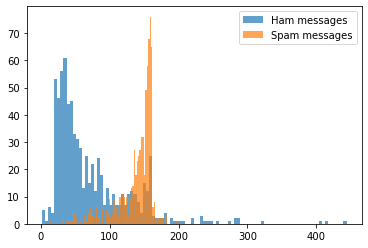

In [26]:
# Ham messages distribution
plt.hist(ham['length'], bins = 100, alpha= 0.7, label = 'Ham messages')

# Spam messages distribution
plt.hist(spam['length'], bins = 100, alpha= 0.7, label = 'Spam messages')
plt.legend()
plt.show()

The spam messages seem to be longer compared to Ham messages.

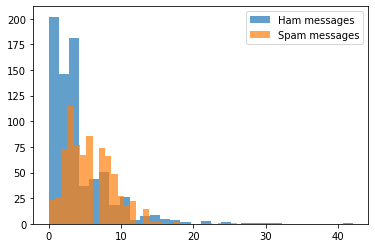

In [30]:
# Ham messages distribution
plt.hist(ham['punct'], bins = 30, alpha= 0.7, label = 'Ham messages')

# Spam messages distribution
plt.hist(spam['punct'], bins = 30, alpha= 0.7, label = 'Spam messages')
plt.legend()
plt.show()

Number of punctuations in a message is not as good as a indicator like the message length, but we can se that the distribution of number of punctuation for spam messages lie more the right handside of the Ham's.

# Data Preparation for training

In [32]:
data.head(2)

,label,message,length,punct
0,ham,HI DARLIN I HOPE YOU HAD A NICE NIGHT I WISH I...,141,0
1,ham,You lifted my hopes with the offer of money. I...,159,3


In [34]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['message'])
X

<1494x4617 sparse matrix of type '<class 'numpy.float64'>'
	with 25621 stored elements in Compressed Sparse Row format>

In [35]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
X.shape

(1494, 4617)

4617 columns represent 4617 unique words in our dataset

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,data['label'],test_size = 0.2,random_state = 1,stratify = data['label'])

In [39]:
X_train.shape,X_test.shape

((1195, 4617), (299, 4617))

# Build and train the models

#### 1. Random forest classifier

In [40]:
#create our classfier
clf = RandomForestClassifier(n_estimators=100, n_jobs = -1)

In [41]:
#Train our model
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [42]:
y_pred = clf.predict(X_test)

In [43]:
confusion_matrix(y_test, y_pred)

array([[149,   0],
       [ 11, 139]])

In our confusion matrix, we can see:

- There are 149 True positive cases of spam messages
- 11 False Negative cases
- 139 True Negatives
- And 0 False positive cases

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       149
        spam       1.00      0.93      0.96       150

    accuracy                           0.96       299
   macro avg       0.97      0.96      0.96       299
weighted avg       0.97      0.96      0.96       299



#### 2. SVM classifier

In [63]:
#create our classfier
clf = SVC(gamma = 'auto', kernel = 'rbf', C = 1000)

In [64]:
#Train our model
clf.fit(X_train,y_train)

SVC(C=1000, gamma='auto')

In [65]:
y_pred = clf.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred)

array([[148,   1],
       [ 14, 136]])

In our confusion matrix, we can see:

- There are 149 True positive cases of spam messages
- 11 False Negative cases
- 139 True Negatives
- And 0 False positive cases

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       149
        spam       0.99      0.91      0.95       150

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



# Test the models with real Data

In [68]:
clf

SVC(C=1000, gamma='auto')

In [72]:
def predict(x):
    x = tfidf.transform([x])
    x = x.toarray()
    pred = clf.predict(x)
    return pred

In [73]:
predict('hey, whassup!')

array(['ham'], dtype=object)

In [78]:
predict('Hello, You got 10 tickets to USA this year!')

array(['ham'], dtype=object)